In [178]:
import pandas as pd
import numpy as np

In [179]:
train_dataset_1 = pd.read_csv("./dataset/drugLibTrain_raw.tsv", sep="\t")
train_dataset_2 = pd.read_csv("./dataset/drugLibTest_raw.tsv", sep="\t")
train_dataset = train_dataset_1.append(train_dataset_2)
train_dataset

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


### Extraction of features
- We want to learn effectiveness of medicine using only benefits Reviews of medicine
- So our extracted dataset will have three columns
    - **benefitsSentiment** : which is the raw text provided by each user
    - **benefitsSentimentProcessed** : After processing our data (removing punctuation, lowercase)
    - **effectiveness** : target data, which we want to learn

In [180]:
benefitsReviewDatasetTraining = pd.DataFrame()
benefitsReviewDatasetTraining["benefitsSentiment"] = train_dataset["benefitsReview"]
benefitsReviewDatasetTraining["benefitsSentimentProcessed"] = train_dataset["benefitsReview"]
benefitsReviewDatasetTraining["effectiveness"] = train_dataset["effectiveness"]
benefitsReviewDatasetTraining

,benefitsSentiment,benefitsSentimentProcessed,effectiveness
0,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,Highly Effective
1,Although this type of birth control has more c...,Although this type of birth control has more c...,Highly Effective
2,I was used to having cramps so badly that they...,I was used to having cramps so badly that they...,Highly Effective
3,The acid reflux went away for a few months aft...,The acid reflux went away for a few months aft...,Marginally Effective
4,I think that the Lyrica was starting to help w...,I think that the Lyrica was starting to help w...,Marginally Effective
...,...,...,...
1031,Detoxing effect by pushing out the system thro...,Detoxing effect by pushing out the system thro...,Considerably Effective
1032,"The albuterol relieved the constriction, irrit...","The albuterol relieved the constriction, irrit...",Highly Effective
1033,Serve Acne has turned to middle,Serve Acne has turned to middle,Considerably Effective
1034,"My overall mood, sense of well being, energy l...","My overall mood, sense of well being, energy l...",Highly Effective


## Checking occurence of each class 
- This helps us checked whether the dataset is imbalanced

In [181]:
# checking to see the amount of each class
countOfField = pd.DataFrame(benefitsReviewDatasetTraining["effectiveness"].value_counts()).reset_index()
countOfField.columns = ["Effectiveness", "Count"] 
countOfField

,Effectiveness,Count
0,Highly Effective,1741
1,Considerably Effective,1238
2,Moderately Effective,572
3,Ineffective,329
4,Marginally Effective,263


### nltk package

In [182]:
import nltk
import re
nltk.download("punkt")
nltk.download("stopwords")
from nltk import word_tokenize
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /home/prelude/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/prelude/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Function to remove stop words, punctuation and converting text to lowercase

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. Examples include, the words like the, he, have etc.

In [183]:
def removeStopWordsAndPucntuation(text):
    tokenized_word = word_tokenize(text)
    filtered_word = " ".join([word for word in tokenized_word if word not in english_stop_words]) # stop words
    filtered_word = re.sub(r"[^a-zA-Z#]", " ", filtered_word) # removes punctuation
    return filtered_word.lower().strip()

In [184]:
stop_words_and_punctuation_removed = [removeStopWordsAndPucntuation(sentence) for sentence in benefitsReviewDatasetTraining["benefitsSentimentProcessed"]]
stop_words_and_punctuation_removed

['slowed progression left ventricular dysfunction overt heart failure alone agents managment hypertension mangagement congestive heart failur',
 'although type birth control cons pros   help cramps   it  s also effective prevention pregnancy     along use condoms well',
 'i used cramps badly would leave balled bed least   days   the ponstel n t take pain away completely   takes edge much normal activities possible   definitely miracle medication',
 'the acid reflux went away months days drug   the heartburn started soon i stopped taking   so i began treatment     months passed i stopped taking   the heartburn came back   seemed worse even   the doctor said i try another   month treatment   i   exact thing happened   this went three years   i asked n t curing reflux   the doctor quite frankly told n t cure      treatment symptoms      i told i would probably rest life',
 'i think lyrica starting help pain   side effects severe continue',
 'taking propecia year   starting    years age ha

## Lemmatization

In [185]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/prelude/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/prelude/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [186]:
def nltkTagToWordnetTag(NLTKtag):
    if NLTKtag.startswith('J'):
        return wordnet.ADJ
    elif NLTKtag.startswith('V'):
        return wordnet.VERB
    elif NLTKtag.startswith('N'):
        return wordnet.NOUN
    elif NLTKtag.startswith('R'):
        return wordnet.ADV
    else:
        return None;   

In [187]:
def lemmatizeText(text):
    nltkTag = nltk.pos_tag(word_tokenize(text))
    #returns tuple( token, word_net )
    wordNetTag = map(lambda item: (item[0], nltkTagToWordnetTag(item[1])), nltkTag )
    lemmatizedText = []
    for word, tag in wordNetTag:
        if tag is None:
            lemmatizedText.append(word)
        else:
            lemmatizedText.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatizedText)

In [188]:
lemmatizeText("harris mentioned that he would have cried") #example of lemmatization

'harris mention that he would have cry'

In [189]:
lemmatizedReviews = benefitsReviewDatasetTraining["benefitsSentimentProcessed"].apply(lambda text: lemmatizeText(text))
lemmatizedReviews

0       slow the progression of left ventricular dysfu...
1       Although this type of birth control have more ...
2       I be use to have cramp so badly that they woul...
3       The acid reflux go away for a few month after ...
4       I think that the Lyrica be start to help with ...
                              ...                        
1031    Detoxing effect by push out the system through...
1032    The albuterol relieve the constriction , irrit...
1033                       Serve Acne have turn to middle
1034    My overall mood , sense of well be , energy le...
1035    Up until 2 year ago , it work really well on a...
Name: benefitsSentimentProcessed, Length: 4143, dtype: object

### Combine Stop Words Removal and Text Lemmatization into One Function
- This promotes easy reuse of code

In [190]:
def processText(raw_text):
    stop_words_and_punctuation_removed_from_raw_text = removeStopWordsAndPucntuation(raw_text)
    lemmatizedRawText = lemmatizeText(stop_words_and_punctuation_removed_from_raw_text)
    lemmatizedRawText = " ".join([w for w in lemmatizedRawText.split() if len(w) > 2]) # removing words with less than 2 letters
    return lemmatizedRawText

In [191]:
processedTrainingText = benefitsReviewDatasetTraining["benefitsSentimentProcessed"].apply(lambda text: processText(text))
processedTrainingText

0       slow progression leave ventricular dysfunction...
1       although type birth control con pros help cram...
2       use cramp badly would leave ball bed least day...
3       the acid reflux away month day drug the heartb...
4       think lyrica start help pain side effect sever...
                              ...                        
1031    detox effect push system skin initially toxins...
1032    the albuterol relieve constriction irritation ...
1033                               serve acne turn middle
1034    overall mood sense well energy level increase ...
1035    year ago work really well scar past year irrit...
Name: benefitsSentimentProcessed, Length: 4143, dtype: object

In [192]:
benefitsReviewDatasetTraining["benefitsSentimentProcessed"] = processedTrainingText
benefitsReviewDatasetTraining.loc[1,:] #difference

,benefitsSentiment,benefitsSentimentProcessed,effectiveness
1,Although this type of birth control has more c...,although type birth control con pros help cram...,Highly Effective
1,Lamictal stabilized my serious mood swings. On...,lamictal stabilize serious mood swing one minu...,Highly Effective


## Plotting top 25 occuring words and a word cloud
- this shows us common words associated benefits reviews

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
from nltk import FreqDist

In [194]:
allWordsString = " ".join([text for text in benefitsReviewDatasetTraining["benefitsSentimentProcessed"]])
allWords = allWordsString.split()
wordDist = FreqDist(allWords)
wordDist

FreqDist({'take': 1530, 'the': 924, 'day': 867, 'pain': 803, 'help': 694, 'drug': 650, 'get': 599, 'effect': 574, 'time': 574, 'well': 563, ...})

In [195]:
wordsFrequency = pd.DataFrame({"word": list(wordDist.keys()), "count" : list(wordDist.values()) })
#top 25 occuring words
wordsFrequencySubsetedAndSorted = wordsFrequency.nlargest(columns="count", n = 25)
wordsFrequencySubsetedAndSorted.sort_values('count', inplace=True)

In [196]:
wordsFrequencySubsetedAndSorted.reset_index()

,index,word,count
0,226,week,421
1,56,start,421
2,514,able,448
3,60,treatment,475
4,32,would,476
5,98,benefit,479
6,76,year,488
7,216,skin,496
8,263,reduce,499
9,50,medication,505


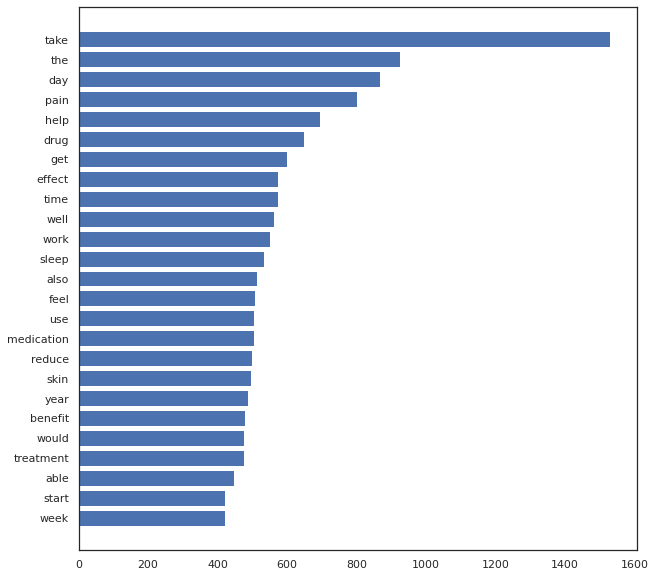

In [197]:
plt.figure(figsize=(10,10))
axis = plt.barh(wordsFrequencySubsetedAndSorted["word"], width= wordsFrequencySubsetedAndSorted["count"])
axis.ylabel = "count"
plt.show()

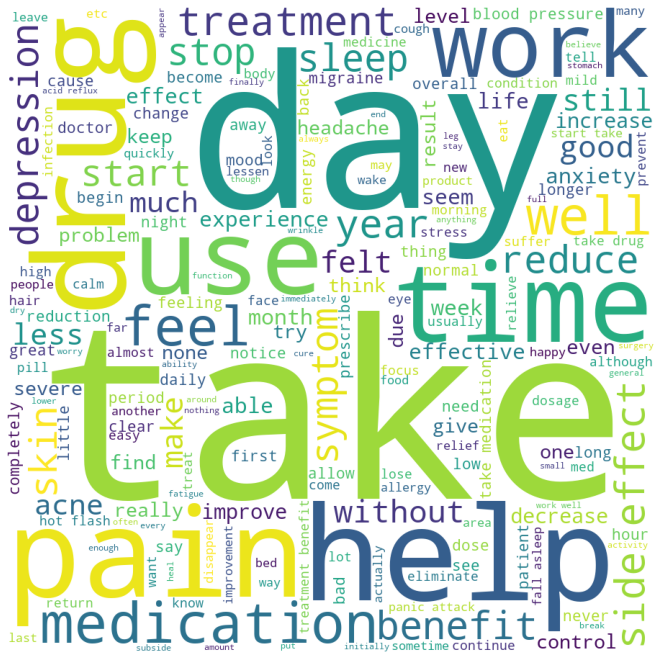

In [198]:
from wordcloud import WordCloud
cloud = WordCloud(width = 900, height = 900, background_color='white', min_font_size=12).generate(allWordsString)
plt.figure(figsize=(9,9))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(cloud)

## Next Steps is to Generate a Bag of Words Model

- Create A Sparse matrix of words corresponding to the reviews
- Split the data into training and validation sets

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [199]:
# Creating a sparse matrix of top 50000 words w.r.t to our reviews
count_vectorizer = CountVectorizer(max_features=50000) 
X = count_vectorizer.fit_transform(benefitsReviewDatasetTraining["benefitsSentimentProcessed"]).toarray()
print("done")

done


In [200]:
X.shape # 3107 reviews, 3000 words 

(4143, 7163)

In [201]:
X # training input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [202]:
benefitsReviewDatasetTraining["effectiveness"] = benefitsReviewDatasetTraining["effectiveness"].astype('category')

In [203]:
Y = benefitsReviewDatasetTraining["effectiveness"].cat.codes # Target


In [204]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(X,Y, test_size=0.1, random_state = 0)

## Training Algorithms Implemented
- Naive Bayes
- Logistic Regression
- AdaBoost

In [205]:
from sklearn.naive_bayes import GaussianNB
naiveBayesClassifier = GaussianNB()
naiveBayesClassifier.fit(X_train,Y_train)
Y_Prediction_Naive_Bayes = naiveBayesClassifier.predict(X_validate)
print("done")

done


In [220]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_Naive_Bayes = accuracy_score(Y_validate,Y_Prediction_Naive_Bayes)
print("Naive Bayes Accuracy", accuracy_Naive_Bayes)

Naive Bayes Accuracy 0.3397590361445783


In [207]:
from sklearn.linear_model import LogisticRegression
logisticRegressionClassifier = LogisticRegression(class_weight="balanced",solver='liblinear', C=0.05, multi_class='ovr',random_state=0)
logisticRegressionClassifier.fit(X_train, Y_train)
Y_Prediction_Logistic_Regression = logisticRegressionClassifier.predict(X_validate)
print("done")

done


In [219]:
accuracy_Logistic_Regression = accuracy_score(Y_validate,Y_Prediction_Logistic_Regression)
print("Logistic Regression Accuracy", accuracy_Logistic_Regression)

Logistic Regression Accuracy 0.4891566265060241


In [209]:
from sklearn.ensemble import AdaBoostClassifier

adaBoostClassifier = AdaBoostClassifier(n_estimators=100, random_state=0)
adaBoostClassifier.fit(X_train, Y_train)

print("done")

done


In [210]:
Y_Prediction_adaBoostClassifier = adaBoostClassifier.predict(X_validate)

In [218]:
accuracy_adaBoostClassifier = accuracy_score(Y_validate,Y_Prediction_adaBoostClassifier)
print("Adaboost Accuracy", accuracy_adaBoostClassifier)

Adaboost Accuracy 0.4457831325301205


In [212]:
cmAdaboost = confusion_matrix(Y_validate,Y_Prediction_adaBoostClassifier)
cmLogisticRegression = confusion_matrix(Y_validate,Y_Prediction_Logistic_Regression)
cmNaiveBayes = confusion_matrix(Y_validate,Y_Prediction_Naive_Bayes)

In [213]:
import itertools
def custom_plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [214]:
CLASSES  = benefitsReviewDatasetTraining["effectiveness"].cat.categories

Normalized confusion matrix


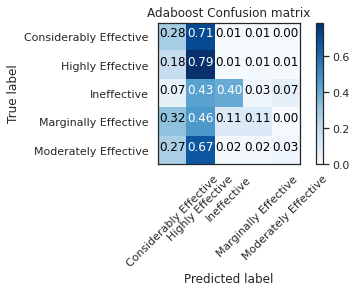

In [215]:
custom_plot_confusion_matrix(cmAdaboost,CLASSES,title='Adaboost Confusion matrix',normalize=True)

Normalized confusion matrix


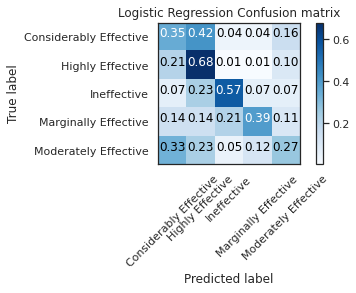

In [216]:
custom_plot_confusion_matrix(cmLogisticRegression ,CLASSES,title='Logistic Regression Confusion matrix',normalize=True)

Normalized confusion matrix


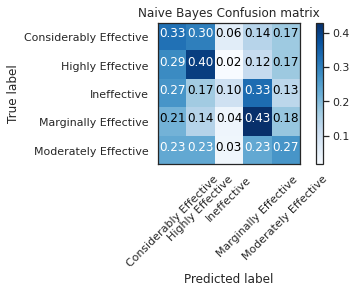

In [217]:
custom_plot_confusion_matrix(cmNaiveBayes,CLASSES,title='Naive Bayes Confusion matrix', normalize=True)

# Summary 

### Accuracy Scores

The overall accuracy of our models are below average : 

- Naive Bayes : 34 %
- Adaboost : 44 %
- Logistic Regression : 48 % 

### Reasons for low accuracy

- Imbalanced Classes
- L